In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import devesh as d

In [3]:
df= pd.read_csv('airline_passenger_satisfaction.csv')

In [4]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [5]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [6]:
df = d.fix_col(df)

In [7]:
df.head()

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,...,on_board_service,seat_comfort,leg_room_service,cleanliness,food_and_drink,in_flight_service,in_flight_wifi_service,in_flight_entertainment,baggage_handling,satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


<Axes: ylabel='Frequency'>

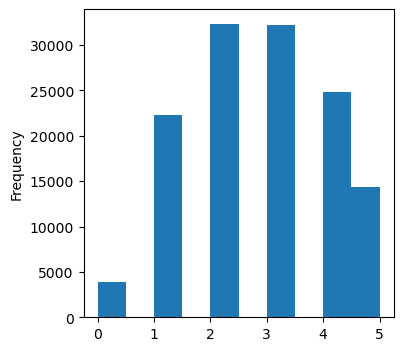

In [8]:
df.in_flight_wifi_service.plot(kind='hist',figsize=(4,4))

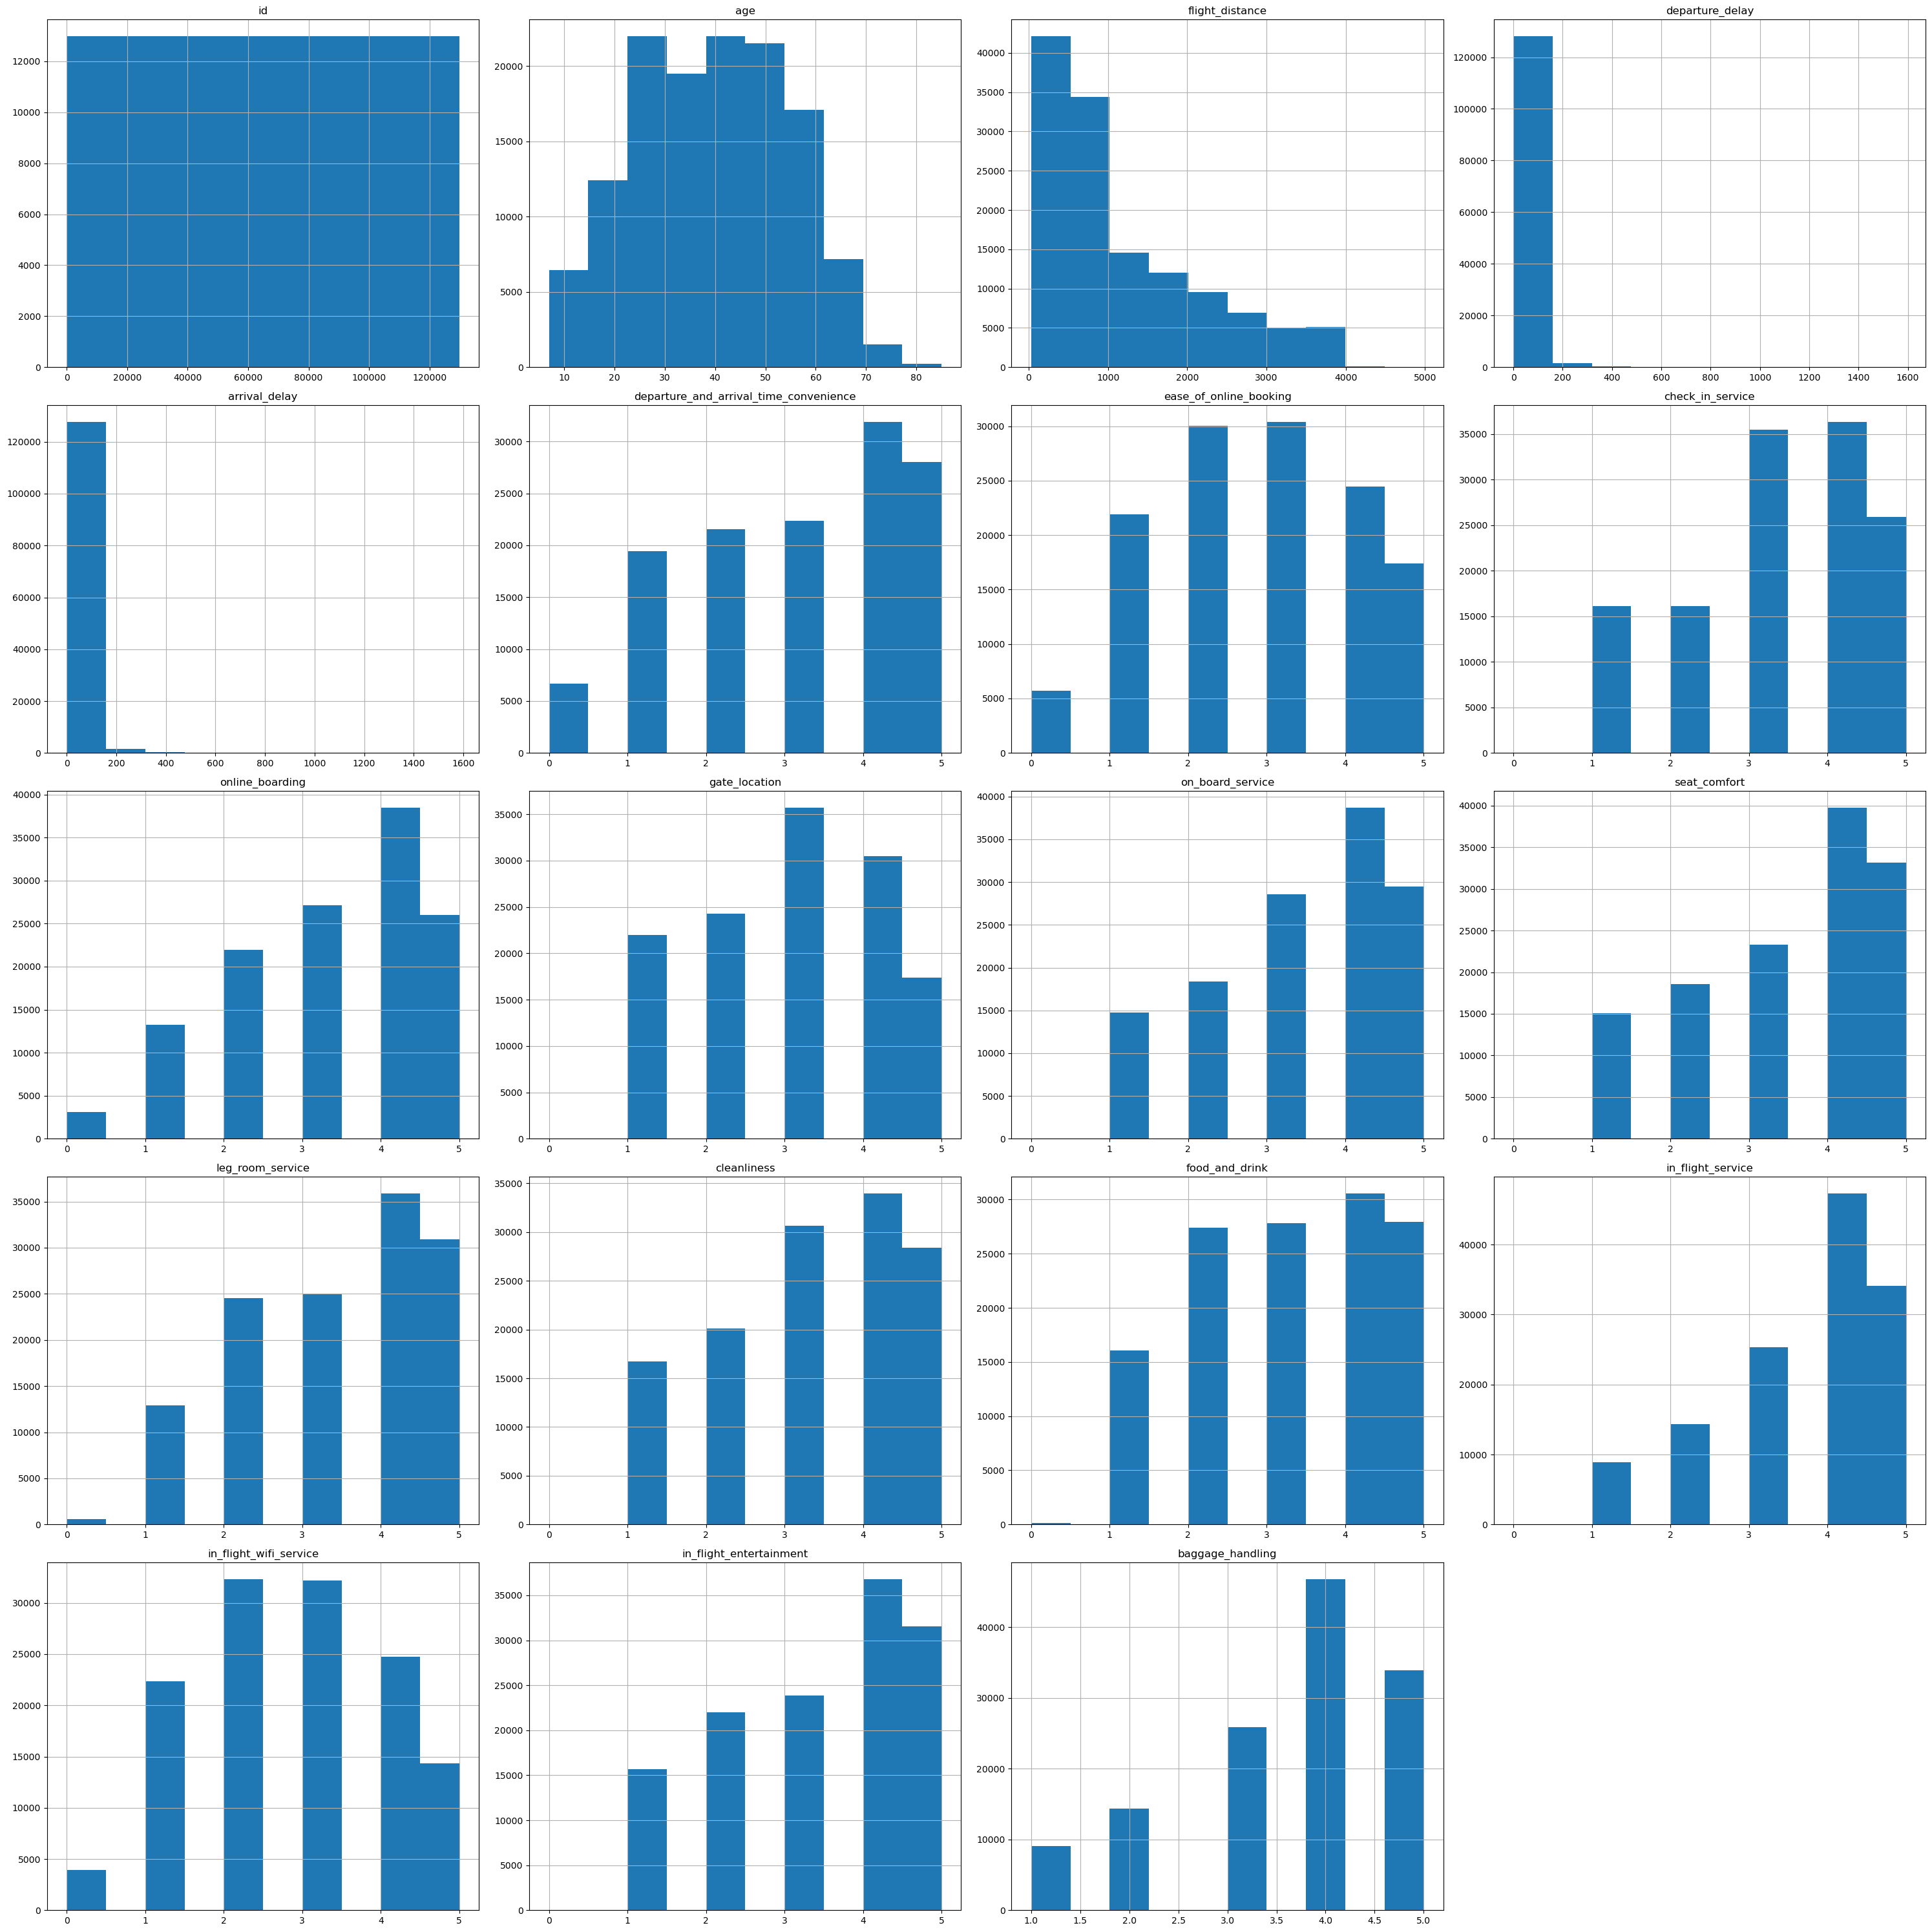

In [9]:
df.hist(figsize=(30,30))
plt.tight_layout()
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [21]:
df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

<Axes: ylabel='Frequency'>

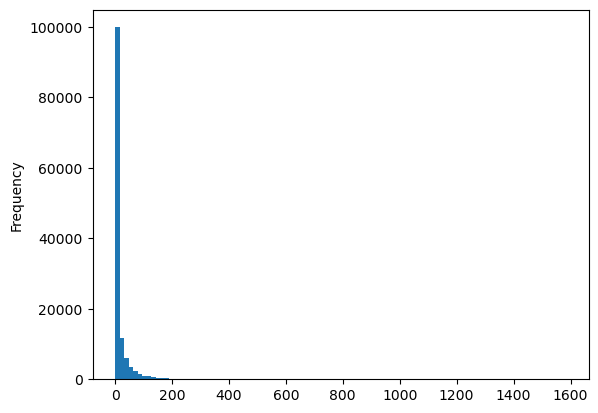

In [30]:
df['Arrival Delay'].plot(kind='hist',bins=100)

In [33]:
df['Arrival Delay'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64

<Axes: ylabel='Frequency'>

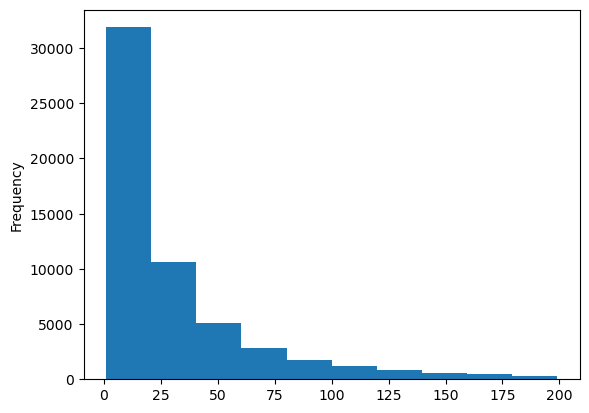

In [43]:
df.loc[(df['Arrival Delay']<200) & (df['Arrival Delay']!=0),'Arrival Delay'].plot(kind='hist')

In [74]:
nodelay = df.loc[df['Arrival Delay']==0]['Arrival Delay'].count()
nodelay=nodelay.item()
type(nodelay)

int

In [75]:
delayed = df.loc[df['Arrival Delay']>0]['Arrival Delay'].count()
delayed = delayed.item()

In [81]:
d = {'delayed':[delayed],'no-delay':[nodelay]}
df1 = pd.DataFrame(d)
df1

,delayed,no-delay
0,56734,72753


<Axes: >

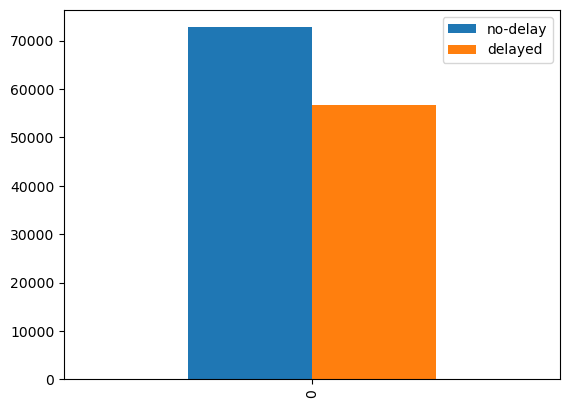

In [91]:
df1.iloc[:,[1,0]].plot(kind='bar')

<Axes: >

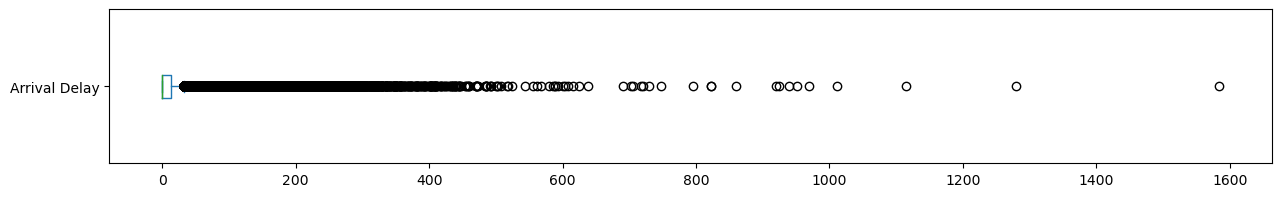

In [96]:
df['Arrival Delay'].plot(kind='box',vert = False, figsize=(15,2))

NameError: name 'ax' is not defined

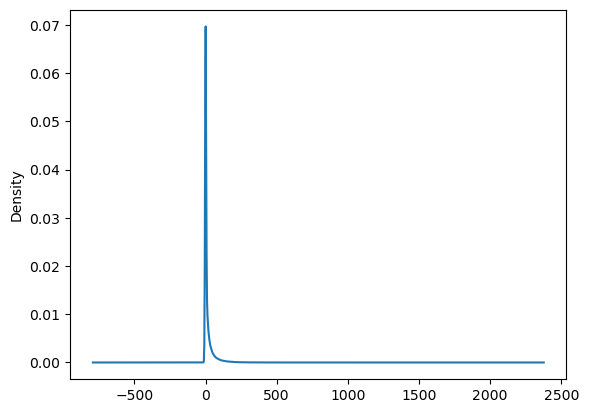

In [101]:
df['Arrival Delay'].plot(kind='density' )
ax.axvline(df['Arrival Delay'].mean())

In [102]:
df.corr()

ValueError: could not convert string to float: 'Male'

In [103]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [104]:
df.sample(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
35490,35491,Male,59,Returning,Personal,Economy,828,23,18.0,4,...,5,3,3,4,4,4,3,4,5,Neutral or Dissatisfied
1150,1151,Male,40,Returning,Personal,Economy,309,0,0.0,5,...,3,3,3,3,3,4,1,3,5,Neutral or Dissatisfied
91795,91796,Female,11,Returning,Personal,Economy,588,0,0.0,4,...,5,4,2,4,4,5,4,4,4,Satisfied
84567,84568,Female,66,Returning,Personal,Economy,2556,0,4.0,1,...,1,3,1,2,1,1,1,1,1,Neutral or Dissatisfied
37295,37296,Male,35,Returning,Business,Business,1912,0,4.0,5,...,5,5,5,2,1,5,5,5,5,Satisfied
28608,28609,Female,36,Returning,Business,Business,2378,10,0.0,3,...,4,3,4,5,2,4,3,4,4,Satisfied
124814,124815,Female,45,Returning,Business,Business,280,3,0.0,3,...,3,3,3,4,3,3,3,3,3,Neutral or Dissatisfied
55491,55492,Male,41,Returning,Business,Economy,1739,37,54.0,1,...,3,1,5,1,1,3,1,1,2,Neutral or Dissatisfied
101993,101994,Male,44,Returning,Personal,Economy,628,0,34.0,5,...,5,4,5,5,5,4,2,5,5,Neutral or Dissatisfied
87169,87170,Male,45,Returning,Business,Business,2920,9,1.0,1,...,4,4,4,4,4,4,1,4,4,Satisfied


In [134]:
l = df.columns

In [135]:
l = list(l)

In [136]:
l

['ID',
 'Gender',
 'Age',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Satisfaction']

In [137]:
l1 = []
for i in l:
    a= i.lower().replace(' ','_')
    a = a.replace('-','_')
    l1.append(a)


In [138]:
l1

['id',
 'gender',
 'age',
 'customer_type',
 'type_of_travel',
 'class',
 'flight_distance',
 'departure_delay',
 'arrival_delay',
 'departure_and_arrival_time_convenience',
 'ease_of_online_booking',
 'check_in_service',
 'online_boarding',
 'gate_location',
 'on_board_service',
 'seat_comfort',
 'leg_room_service',
 'cleanliness',
 'food_and_drink',
 'in_flight_service',
 'in_flight_wifi_service',
 'in_flight_entertainment',
 'baggage_handling',
 'satisfaction']

In [139]:
d = dict(zip(l,l1))
d

{'ID': 'id',
 'Gender': 'gender',
 'Age': 'age',
 'Customer Type': 'customer_type',
 'Type of Travel': 'type_of_travel',
 'Class': 'class',
 'Flight Distance': 'flight_distance',
 'Departure Delay': 'departure_delay',
 'Arrival Delay': 'arrival_delay',
 'Departure and Arrival Time Convenience': 'departure_and_arrival_time_convenience',
 'Ease of Online Booking': 'ease_of_online_booking',
 'Check-in Service': 'check_in_service',
 'Online Boarding': 'online_boarding',
 'Gate Location': 'gate_location',
 'On-board Service': 'on_board_service',
 'Seat Comfort': 'seat_comfort',
 'Leg Room Service': 'leg_room_service',
 'Cleanliness': 'cleanliness',
 'Food and Drink': 'food_and_drink',
 'In-flight Service': 'in_flight_service',
 'In-flight Wifi Service': 'in_flight_wifi_service',
 'In-flight Entertainment': 'in_flight_entertainment',
 'Baggage Handling': 'baggage_handling',
 'Satisfaction': 'satisfaction'}

In [140]:
df.rename(d, axis=1, inplace=True)

In [141]:
df

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,...,on_board_service,seat_comfort,leg_room_service,cleanliness,food_and_drink,in_flight_service,in_flight_wifi_service,in_flight_entertainment,baggage_handling,satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [142]:
df.columns

Index(['id', 'gender', 'age', 'customer_type', 'type_of_travel', 'class',
       'flight_distance', 'departure_delay', 'arrival_delay',
       'departure_and_arrival_time_convenience', 'ease_of_online_booking',
       'check_in_service', 'online_boarding', 'gate_location',
       'on_board_service', 'seat_comfort', 'leg_room_service', 'cleanliness',
       'food_and_drink', 'in_flight_service', 'in_flight_wifi_service',
       'in_flight_entertainment', 'baggage_handling', 'satisfaction'],
      dtype='object')

In [144]:
df.nunique()

id                                        129880
gender                                         2
age                                           75
customer_type                                  2
type_of_travel                                 2
class                                          3
flight_distance                             3821
departure_delay                              466
arrival_delay                                472
departure_and_arrival_time_convenience         6
ease_of_online_booking                         6
check_in_service                               6
online_boarding                                6
gate_location                                  6
on_board_service                               6
seat_comfort                                   6
leg_room_service                               6
cleanliness                                    6
food_and_drink                                 6
in_flight_service                              6
in_flight_wifi_servi

In [157]:
df.loc[df.arrival_delay.isnull()].departure_delay.unique()

array([ 38,   0,   2,  58,   5, 109,  15,  32,   6, 166,  22, 118,  14,
        70,  48,  96,  17,  12, 266, 198,  11, 127,  10,  92,  13,   8,
        46,   4,  81,  62,  16, 126, 190,  73, 110,  33,  84,  35,  60,
        24,   1,  89,  20, 121, 174,  26,  30, 116,  44,   3,  27,  98,
       193, 155, 142, 455,  61, 414,  55, 160, 157, 230,  95,  29, 271,
        45,  57,  42,   9,  51,  37, 113,  71,  28, 100, 131,   7, 119,
        77,  31, 150,  21,  40,  54,  66,  19, 175, 217, 153,  41,  76,
       202, 125,  86,  80, 530, 332, 123,  85, 106,  64,  23, 186,  36,
       183,  69, 151, 181, 254, 102,  91, 136, 140, 158, 154,  99,  74,
       115,  72, 107,  63], dtype=int64)

In [14]:
df.isnull().mean()*100

id                                        0.000000
gender                                    0.000000
age                                       0.000000
customer_type                             0.000000
type_of_travel                            0.000000
class                                     0.000000
flight_distance                           0.000000
departure_delay                           0.000000
arrival_delay                             0.302587
departure_and_arrival_time_convenience    0.000000
ease_of_online_booking                    0.000000
check_in_service                          0.000000
online_boarding                           0.000000
gate_location                             0.000000
on_board_service                          0.000000
seat_comfort                              0.000000
leg_room_service                          0.000000
cleanliness                               0.000000
food_and_drink                            0.000000
in_flight_service              